In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pysheds.grid import Grid
import scipy.ndimage
import seaborn as sns

%matplotlib inline

# Load data

In [2]:
grid = Grid.from_raster('briarwood', data_name='lidar')

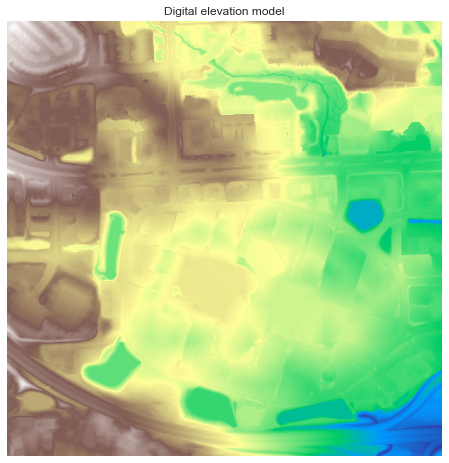

In [3]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(grid.lidar, cmap='terrain', extent=grid.extent, zorder=1)
_ = ax.xaxis.set_ticklabels([])
_ = ax.yaxis.set_ticklabels([])
_ = plt.title('Digital elevation model')

# Find all depressions

In [4]:
depressions = grid.detect_depressions('lidar')

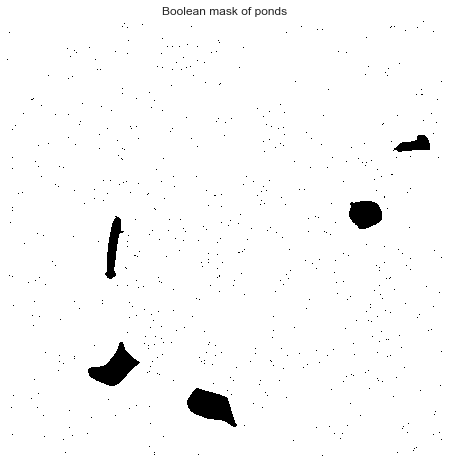

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(depressions, extent=grid.extent, zorder=1)
_ = ax.xaxis.set_ticklabels([])
_ = ax.yaxis.set_ticklabels([])
_ = plt.title('Boolean mask of ponds')

# Filter small pits and uniquely label ponds

In [6]:
# Create labeled array from boolean mask
labeled_depressions, n_depressions = scipy.ndimage.label(depressions)

In [7]:
# Specify minimum size of ponds
threshold_size = 100
above_threshold = np.flatnonzero(np.bincount(labeled_depressions.ravel()) > threshold_size)

In [8]:
# Uniquely label ponds from 0 to N
ponds = np.zeros(grid.lidar.shape)
for i in range(len(above_threshold)):
    ponds[labeled_depressions == above_threshold[i]] = i
ponds = np.where(ponds, ponds, np.nan)

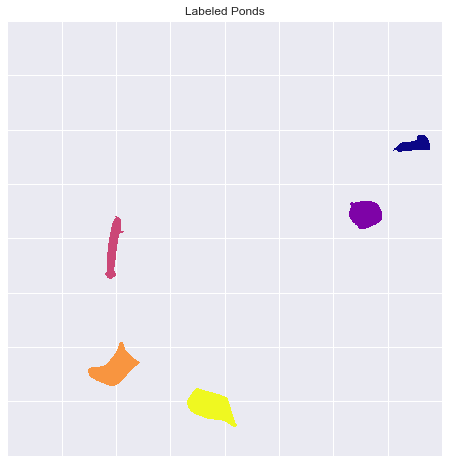

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(ponds, extent=grid.extent, cmap='plasma', zorder=1)
_ = ax.xaxis.set_ticklabels([])
_ = ax.yaxis.set_ticklabels([])
_ = plt.title('Labeled Ponds')